In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/esigning-of-loan-based-on-financial-history/financial_data.csv


# Load & Explore Data

In [2]:
df = pd.read_csv("/kaggle/input/esigning-of-loan-based-on-financial-history/financial_data.csv")

In [3]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
df.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
entry_id                17908 non-null int64
age                     17908 non-null int64
pay_schedule            17908 non-null object
home_owner              17908 non-null int64
income                  17908 non-null int64
months_employed         17908 non-null int64
years_employed          17908 non-null int64
current_address_year    17908 non-null int64
personal_account_m      17908 non-null int64
personal_account_y      17908 non-null int64
has_debt                17908 non-null int64
amount_requested        17908 non-null int64
risk_score              17908 non-null int64
risk_score_2            17908 non-null float64
risk_score_3            17908 non-null float64
risk_score_4            17908 non-null float64
risk_score_5            17908 non-null float64
ext_quality_score       17908 non-null float64
ext_quality_score_2     17908 non-null float64
inquiries_last_month   

In [6]:
df.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


# Data Cleaning

In [7]:
# Check missing values
df.isnull().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [8]:
# Remove unwanted column
df_new = df.drop(columns=["entry_id", "e_signed", "pay_schedule"])

In [9]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


# Visualization

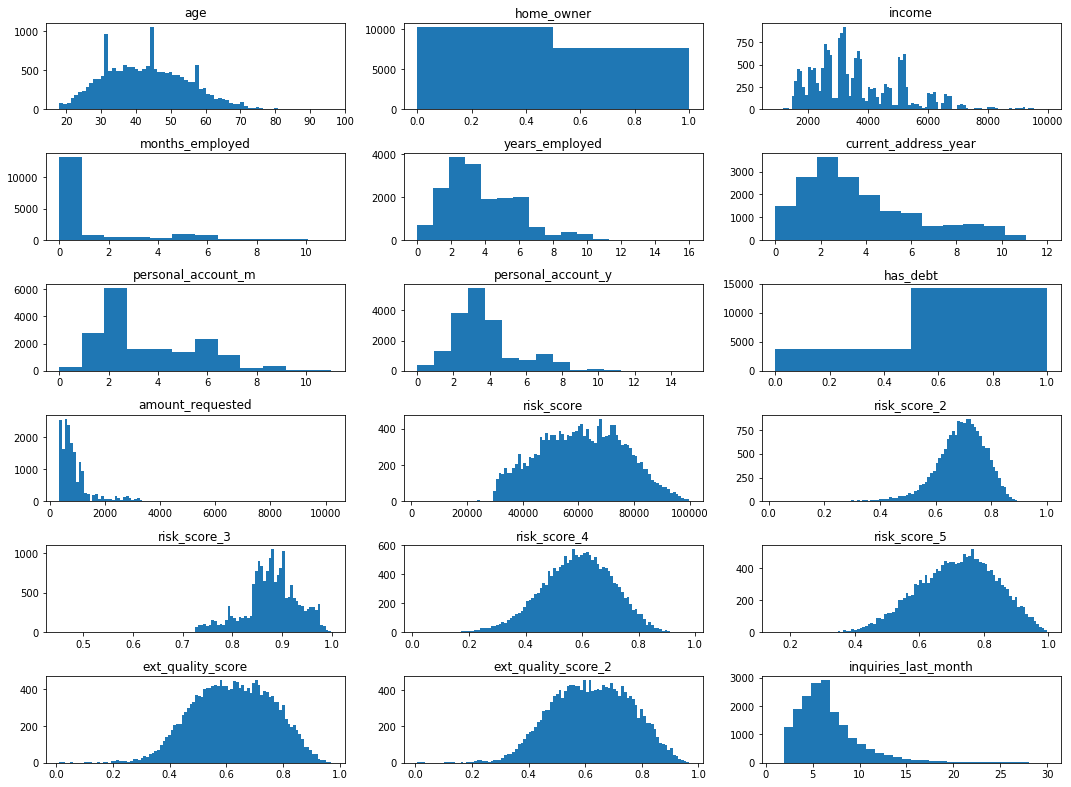

In [10]:
# Histogram for every single column
plt.figure(figsize=(15, 12))
for i in range(df_new.shape[1]):
    plt.subplot(6, 3, i+1)
    f = plt.gca()
    f.set_title( df_new.columns.values[i])
    bins = len(df_new.iloc[:, i].unique())
    if bins >= 100:
        bins = 100
    plt.hist(df_new.iloc[:, i], bins=bins)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Correlation Histogram

Correlation is very important factor. it show how your variables are connected to each other. High magnitude means high correlation. + sign means if one increases, other also increases. - sign means they are inversly proportional. that mean if one increases, other will decrease. But still its a negative relationship.
Point to remember:
<ul>
    <li>High Maginitude - High Correlation</li>
    <li>+ sign means directly proportional.</li>
    <li>- sign means inversely proportional</li>
    </ul>

In [11]:
df_new.corrwith(df.e_signed)

age                    -0.096998
home_owner             -0.047409
income                  0.031377
months_employed         0.010128
years_employed          0.003748
current_address_year   -0.018969
personal_account_m     -0.081195
personal_account_y     -0.024160
has_debt                0.039192
amount_requested        0.069572
risk_score              0.086098
risk_score_2            0.010473
risk_score_3           -0.037483
risk_score_4            0.006147
risk_score_5           -0.007541
ext_quality_score      -0.032129
ext_quality_score_2    -0.024271
inquiries_last_month   -0.025165
dtype: float64

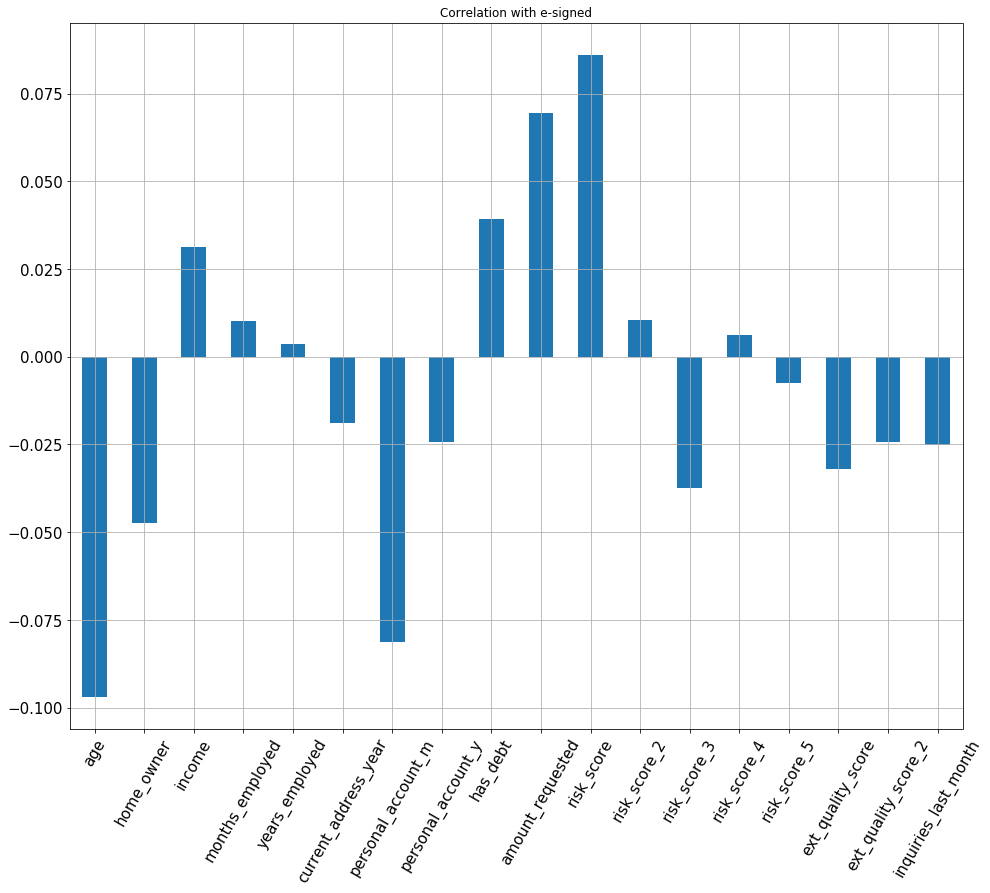

In [12]:
df_new.corrwith(df.e_signed).plot.bar(rot=60, figsize=(16, 13), title="Correlation with e-signed", grid=True
                                     , fontsize=15)

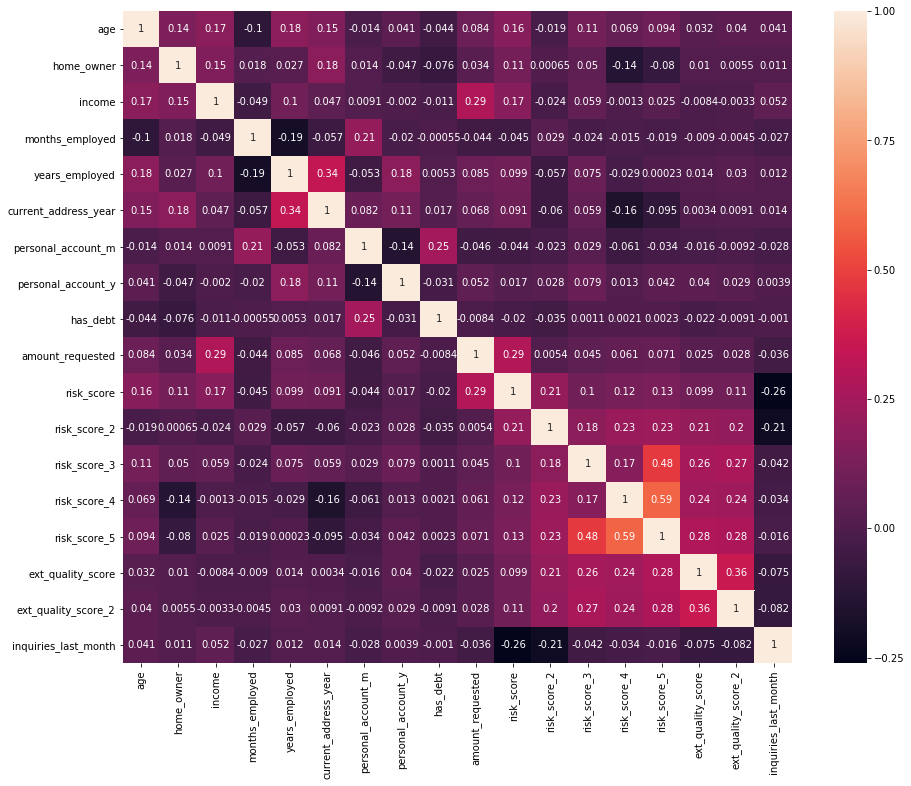

In [13]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_new.corr(), annot=True)

In [14]:
df_new.head()

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10
1,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
2,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
3,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
4,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12


# Feature Engineering

Feature engineering is a vast term. It means to do something in your feature so that we can get a smaller dimensions. It may include feature extraction, deleting a feature or creating a new feature with the combination of two or more features. So in our case we can see personal_account_m, personal_account_y are almost same one show months and other show years. So we can combine both columns in a single column called personal_account_months and drop both the columns. In this way we can reduce our dimension by one column. Not very big diffrence but still something is better than nothing.

In [15]:
# personal_account_m & personal_account_y column can be changed to single column personal_Account_months

df["personal_account_month"] = df["personal_account_m"] + 12* df["personal_account_y"]

In [16]:
users = df["entry_id"]
response = df["e_signed"]
df.drop(columns=["entry_id", "months_employed", "e_signed","personal_account_m", "personal_account_y"], inplace=True)

In [17]:
df.head()

,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_month
0,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,30
1,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,86
2,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,19
3,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,86
4,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,98


# Handling Categorical Features

Dummy variables are for handling categorical variable. While creating dummy variable always use drop_first=True otherwise you have to drop one dummy variable column manually to avoid dummy variable trap. you can search this term on google. In short, it says never include all dummy variables, always leave one. e.g. if you have n dummy variables then you should take n-1 variables.

In [18]:
df = pd.get_dummies(df, drop_first=True)

In [19]:
df.columns

Index(['age', 'home_owner', 'income', 'years_employed', 'current_address_year',
       'has_debt', 'amount_requested', 'risk_score', 'risk_score_2',
       'risk_score_3', 'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'personal_account_month',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [20]:
df.head()

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_month,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,40,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,30,0,0,0
1,61,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,86,0,0,1
2,23,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,19,0,0,1
3,40,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,86,0,0,0
4,33,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,98,0,1,0


In [21]:
X = df.values
y= response.values

In [22]:
y

array([1, 0, 0, ..., 0, 1, 1])

# Data Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# SVM Model

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
clf = RandomForestClassifier(n_estimators =10, max_features=10, random_state=0,  criterion='entropy')
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
y_predict = clf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predict)
#sns.heatmap(cm, annot=True)
cm

array([[1566,  926],
       [1253, 1628]])

In [28]:
# accuracy
clf.score(X_test, y_test) # we can see score is very bad. Lets apply gridsearchcv to fine tune our model

0.5944537502326447

# Fine Tuning using GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators" : [10, 100, 200 ],  "criterion":["entropy", "gini"]
}
gs = GridSearchCV(estimator=clf, param_grid=params, cv=10)

In [30]:
result = gs.fit(X_train, y_train)

In [31]:
result.best_params_

{'criterion': 'entropy', 'n_estimators': 200}

In [32]:
result.best_score_

0.6317510969285999

In [33]:
#So we can see our best accuracy is 63%. Actually acocrding to our data it is a good accuracy and our case study is not that sensitive so it may compromise with some %of accuracy.
# lets train and fit our final model with the best params.
clf = RandomForestClassifier(n_estimators=200, criterion="entropy")
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm

array([[1376, 1116],
       [ 844, 2037]])

In [34]:
classification_report(y_test, y_predict)

'              precision    recall  f1-score   support\n\n           0       0.62      0.55      0.58      2492\n           1       0.65      0.71      0.68      2881\n\n    accuracy                           0.64      5373\n   macro avg       0.63      0.63      0.63      5373\nweighted avg       0.63      0.64      0.63      5373\n'

# Deep Learning Model

In [35]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [36]:
clf_n = Sequential([
    Dense(activation="relu", init="uniform", input_dim=19, output_dim=10),
    Dense(activation="relu", init="uniform", output_dim=10),
    Dropout(0.5),
    Dense(activation="relu", init="uniform", output_dim=10),
    Dense(activation="sigmoid", init="uniform", output_dim=1)
])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=19, units=10, kernel_initializer="uniform")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [37]:
clf_n.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


In [38]:
clf_n.compile(optimizer="adam", metrics=["accuracy"], loss="binary_crossentropy")

In [39]:
print(X_train.shape)
print(np.array(y_train.shape))

(12535, 19)
[12535]


In [40]:
clf_n.fit((X_train), (y_train), batch_size=20, epochs=50)

Epoch 1/50
12535/12535 [==============================] - 3s 239us/step - loss: 0.6913 - accuracy: 0.5376
Epoch 2/50
12535/12535 [==============================] - 2s 163us/step - loss: 0.6904 - accuracy: 0.5391
Epoch 3/50
12535/12535 [==============================] - 2s 163us/step - loss: 0.6903 - accuracy: 0.5391
Epoch 4/50
12535/12535 [==============================] - 2s 165us/step - loss: 0.6901 - accuracy: 0.5391
Epoch 5/50
12535/12535 [==============================] - 2s 162us/step - loss: 0.6901 - accuracy: 0.5391
Epoch 6/50
12535/12535 [==============================] - 2s 163us/step - loss: 0.6901 - accuracy: 0.5391
Epoch 7/50
12535/12535 [==============================] - 2s 163us/step - loss: 0.6901 - accuracy: 0.5391
Epoch 8/50
12535/12535 [==============================] - 2s 163us/step - loss: 0.6902 - accuracy: 0.5391
Epoch 9/50
12535/12535 [==============================] - 2s 167us/step - loss: 0.6902 - accuracy: 0.5391
Epoch 10/50
12535/12535 [=====================

In [41]:
# So here we can see our deep learning network accuracy is very less. It may be because of data. As deep learning requires a large datasets. So for our case we will settle with
# random forest classifier. You also try diffrent model to fine tune and let us know which one do you feel suits our case study.
# Thanks... UPVOTE IF YOU LIKE THE KERNEL